University of Stirling<br>
Computing Science and Mathematics<br>
#### CSCU9YE - Artificial Intelligence<p>   
## Assignment: Organising a Colour Palette 
This notetbook offers some auxiliary code to support your programming assignment.    

In [1]:
#This is a solution for data clustering. In this solution, we explore 3 different algorithms we can use for this problem.
#The solution includes k-means, Birch and Agglomerative

#Imports
import sys
import os
import statistics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from io import StringIO
from IPython import get_ipython
from sklearn import preprocessing
from sklearn import preprocessing
from astropy import units as u
from astropy.table import QTable, Table, Column
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from IPython.display import clear_output

#Global varibales
# isRunning = True
file = 0
tries = 0

#Assigning them a terrible value as a starting solution
cl_best500 = 1000
cl_best100 = 1000

#This function reads the file and retruns the number of colours and its list index
#@Params fname
#@Returns ncols, cols
def read_data(fname):
    cols = np.loadtxt(fname, skiprows = 4) # The first 4 lines have text information, and are ignored     
    ncols = len(cols)     # Total number of colours and list of colours
    return ncols,cols

#This function plots a coloured graph displaying the order of the clustered solution 
#@Params col_list, col_order, ratio
def plot_colors(col_list, col_order, ratio = 10):
    assert len(col_list) == len(col_order)
    img = np.zeros((ratio, len(col_list), 3))
    for i in range(0, len(col_list)):
        img[:, i, :] = col_list[col_order[i]]
    fig, axes = plt.subplots(1, figsize=(10,6)) # figsize=(width,height) handles window dimensions
    axes.imshow(img, interpolation='nearest')
    axes.axis('off')
    plt.show()

#This function returns a different matrix norm based on the paramters. It can be used in conjuction with the evaluate function below
#@Params v, u
#@Returns np (matrix)
def euclid(v, u):
    return np.linalg.norm(v - u)

#This function evalautes and returns the sum of the distance of the solution
#@Params ncols, cols
#@Returns double
def evaluate(cols, ordc):     
    adjacentColPairs = [[cols[ordc[i]],cols[ordc[i-1]]] for i in range(1,len(ordc))]
    return sum([euclid(i[1], i[0]) for i in adjacentColPairs])

#This function deals with the core calls needed to run the system.
#@Returns distance, test, order
def cluster(clusterValue, currentAlgorithm):
    data = generateDataFile()
    data_scaled = preProcessData(data)
    
    if currentAlgorithm == "KMeans":
        clusters = applyClusteringKMeans(clusterValue, data_scaled)
    elif currentAlgorithm == "Birch":
        clusters = applyClusteringBirch(clusterValue, data_scaled)
    elif currentAlgorithm == "Agglo":
        clusters = applyClusteringAgglomerative(clusterValue, data_scaled)
    
    order = [i for i in range(ncolors)]
    setColumns(order,clusters, data)
    data = sortClusters(data)
    test = generateNumpyArr(data)
    distance = evaluate(test,order)
    return distance, test

#This function returns a customised DataFrame
#@Returns pd
def generateDataFile():
    return pd.DataFrame({'R': colors[:, 0], 'G': colors[:, 1], 'B': colors[:, 2]})

#This function scales and applies the preprocessing to the raw data and returns a processed copy
#@Params data
#@Returns data_scaled
def preProcessData(data):
    data_scaled = preprocessing.scale(data)   # This produces a matrix with the scaled data.
    data_scaled = pd.DataFrame(data_scaled)   # We transform it to a data frame for clustering
    return data_scaled

#This function uses the K-Means clustering algorithm
#This is one of the 3 algorithms explored in this system
#It computes cluster centers and predicts cluster index for each sample.
#@Params clusterValue, data_scaled
#@Returns clusters
def applyClusteringKMeans(clusterValue, data_scaled):
    kmeans = KMeans(n_clusters = clusterValue)
    clusters = kmeans.fit_predict(data_scaled)
    return clusters

def applyClusteringBirch(clusterValue, data_scaled):
    birch = Birch(n_clusters = clusterValue)
    clusters = birch.fit_predict(data_scaled)
    return clusters

def applyClusteringAgglomerative(clusterValue, data_scaled):
    agglomerativeclustering = AgglomerativeClustering(n_clusters = clusterValue)
    clusters = agglomerativeclustering.fit_predict(data_scaled)
    return clusters

#This function sets 2 columns in the dataframe
#@Params order, clusters, data
def setColumns(order,clusters, data):
    data['Clusters'] = clusters
    data['ColorID'] = order

#This function sorts the DataFrame by index of "Clusters"
#@Params data
#@Returns data
def sortClusters(data):
    data = data.sort_values(by=['Clusters'])
    return data

#This function translates and returns a copy of the DataFrame to a NumPy array
#@Params data
#@Returns test
def generateNumpyArr(data):
    test = data[['R', 'G', 'B']].to_numpy()
    return test

#This function calls the startSystem an 'n' amount of time (user dependant) and stores the best value found
#@Params tries
#@Returns bestV, test, order
def iterator(clusterValue, currentAlgorithm):
    value, clustered_data = cluster(clusterValue, currentAlgorithm)
#         if (findBestCluster):
#             clusterValue += 1
    return value, clustered_data

<h3>Clustering 100 colors</h3>

KMeans 20 clusters


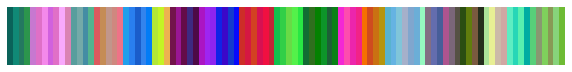

Evaluation: 30.090518531564285

KMeans 7 clusters


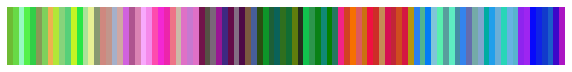

Evaluation: 33.32975584188554





Birch 20 clusters


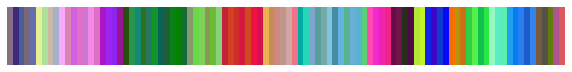

Evaluation: 30.610035304191676

Birch 7 clusters


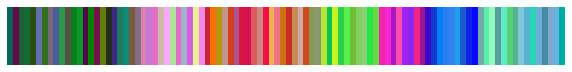

Evaluation: 35.423176418963735





Agglomerative 20 clusters


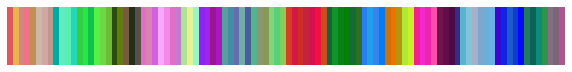

Evaluation: 27.75063562057974

Agglomerative 7 clusters


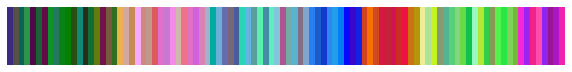

Evaluation: 33.68270876291953


In [2]:
file = "col100.txt"
clusterValue = 20
ncolors, colors = read_data(file)

# KMeans
kmeans100_best_val, kmeans100 = iterator(clusterValue, "KMeans")
birch100_best_val, birch100 = iterator(clusterValue, "Birch")
agglo100_best_val, agglo100 = iterator(clusterValue, "Agglo")

order = [i for i in range(ncolors)]

# KMeans Clustering
print("KMeans 20 clusters")
plot_colors(kmeans100, order)
print("Evaluation:", evaluate(kmeans100, order))
print()
print("KMeans 7 clusters")
kmeans100_best_val, kmeans100 = iterator(7, "KMeans")
plot_colors(kmeans100, order)
print("Evaluation:", evaluate(kmeans100, order))
print("\n\n\n\n")

# Birch Clustering
print("Birch 20 clusters")
plot_colors(birch100, order)
print("Evaluation:", evaluate(birch100, order))
print()
print("Birch 7 clusters")
birch100_best_val, birch100 = iterator(7, "Birch")
plot_colors(birch100, order)
print("Evaluation:", evaluate(birch100, order))
# plot_trace(birch100_trace)
print("\n\n\n\n")

# KMeans Clustering
print("Agglomerative 20 clusters")
plot_colors(agglo100, order)
print("Evaluation:", evaluate(agglo100, order))
print()
print("Agglomerative 7 clusters")
agglo100_best_val, agglo100 = iterator(7, "Agglo")
plot_colors(agglo100, order)
print("Evaluation:", evaluate(agglo100, order))
# plot_trace(agglo100_trace)

<h3>Clustering 500 colors</h3>

In [3]:
file = "col500.txt"
clusterValue = 46
ncolors, colors = read_data(file)

# KMeans
kmeans500_best_val, kmeans500 = iterator(clusterValue, "KMeans")
birch500_best_val, birch500 = iterator(clusterValue, "Birch")
agglo500_best_val, agglo500 = iterator(clusterValue, "Agglo")

order = [i for i in range(ncolors)]

# KMeans Clustering
print("KMeans 46 clusters")
plot_colors(kmeans500, order)
print("Evaluation:", evaluate(kmeans500, order))
print()
print("KMeans 7 clusters")
kmeans500_best_val, kmeans500 = iterator(7, "KMeans")
plot_colors(kmeans500, order)
print("Evaluation:", evaluate(kmeans500, order))
print("\n\n\n\n")

# Birch Clustering
print("Birch 46 clusters")
plot_colors(birch500, order)
print("Evaluation:", evaluate(birch500, order))
print()
print("Birch 7 clusters")
birch500_best_val, birch500 = iterator(7, "Birch")
plot_colors(birch500, order)
print("Evaluation:", evaluate(birch500, order))
# plot_trace(birch500_trace)
print("\n\n\n\n")

# KMeans Clustering
print("Agglomerative 46 clusters")
plot_colors(agglo500, order)
print("Evaluation:", evaluate(agglo500, order))
print()
print("Agglomerative 7 clusters")
agglo500_best_val, agglo500 = iterator(7, "Agglo")
plot_colors(agglo500, order)
print("Evaluation:", evaluate(agglo500, order))

KMeans 46 clusters


Evaluation: 110.30000767801221

KMeans 7 clusters


Evaluation: 172.04630996536275





Birch 46 clusters


Evaluation: 112.28390719952039

Birch 7 clusters


Evaluation: 192.9308611785898





Agglomerative 46 clusters


Evaluation: 105.69698355129572

Agglomerative 7 clusters


Evaluation: 187.60079081065564


<h3>Final Results</h3>

When it comes to clustering the colors, I believe there is two ways that we can go about it.<br>
For the first, a good ordering will be evaluated based on its looks rather than its final evaluation score.<br>
The second is to choose a color based on its final Euclidean distance.<br><br>
The solution clustered with 7 clusters is more appealing to the eyes than the ones with 20 (for a 100 colors) or  46 (500 colours), even though those solutions do not have the best Euclidean distance.<br>
This is a lot more noticeable for the 500 colors file.


Furthermore, the agglomerative clustering seems to provide better results when it comes to the Euclidean distance, without making a big difference on the appearance of the color plot.<br>
That is why we have chosen the Agglomerative clustering for our final solution.

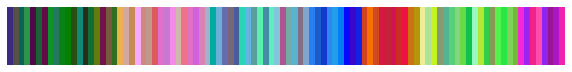

In [4]:
file = "col100.txt"
clusterValue = 7
ncolors, colors = read_data(file)
order = [i for i in range(ncolors)]

# KMeans
agglo100_best_val, agglo100 = iterator(clusterValue, "Agglo")
plot_colors(agglo100, order)

#############################################################

file = "col500.txt"
clusterValue = 7
ncolors, colors = read_data(file)
order = [i for i in range(ncolors)]

# KMeans
agglo500_best_val, agglo500 = iterator(clusterValue, "Agglo")
plot_colors(agglo500, order)